<a href="https://colab.research.google.com/github/AlejandroSenabre/Data-Analysis-with-SQL/blob/main/BikeStore_with_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto, se utilizará SQL para analizar datos desde Python usando sqlite3, una biblioteca que permite interactuar con bases de datos SQLite desde Python. El objetivo es demostrar la potencia y versatilidad de SQL como herramienta para el análisis de datos, así como las ventajas de combinarlo con Python y SQLite. Se realizarán las siguientes tareas:

- Importar y limpiar datos desde archivos CSV a tablas SQLite
- Realizar consultas SQL para seleccionar, filtrar, agrupar y ordenar datos
- Usar funciones de agregación, operadores lógicos y cláusulas JOIN para obtener información relevante de los datos
- Graficar los resultados usando la biblioteca matplotlib de Python
- Concluir con las principales observaciones y recomendaciones derivadas del análisis

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
sns.set()

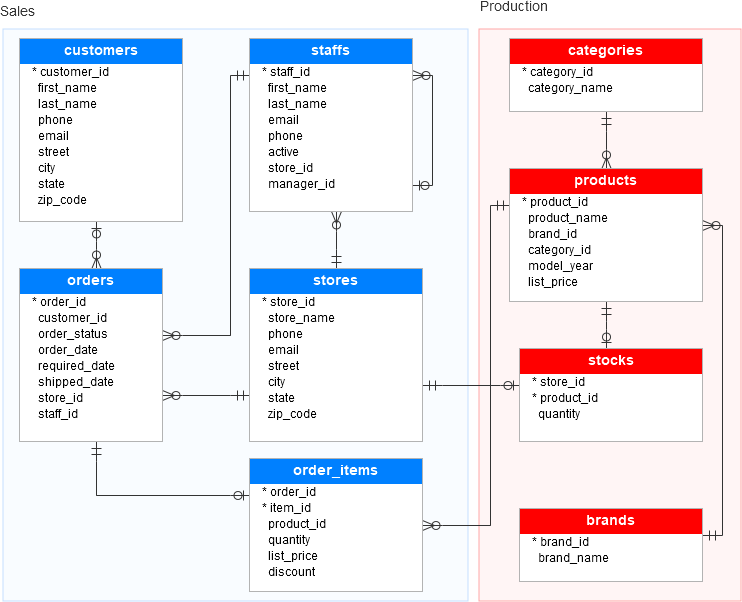

El Diagrama de tablas original estaba pensado para que esté distribuido en dos bases de datos distintas ("Sales" "Production") pero para simplificar la operatoria se lo subira todo a una unica base de datos llamada "bike_store".

In [66]:
# Cargamos los datos de la URL como un DataFrame de Pandas
brands=pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/brands.csv')
categories=pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/categories.csv')
customers=pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/customers.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/order_items.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/orders.csv')
products = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/products.csv')
staffs = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/staffs.csv')
stocks = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/stocks.csv')
stores = pd.read_csv('https://raw.githubusercontent.com/AlejandroSenabre/Data-Analysis-with-SQL/main/Table/stores.csv')

In [67]:
# Create database connection
connection = sqlite3.connect('bike_store.db')

# Insert data into database
brands.to_sql('brands', connection, if_exists='replace', index=False)
categories.to_sql('categories', connection, if_exists='replace', index=False)
customers.to_sql('customers', connection, if_exists='replace', index=False)
order_items.to_sql('order_items', connection, if_exists='replace', index=False)
orders.to_sql('orders', connection, if_exists='replace', index=False)
products.to_sql('products', connection, if_exists='replace', index=False)
staffs.to_sql('staffs', connection, if_exists='replace', index=False)
stocks.to_sql('stocks', connection, if_exists='replace', index=False)
stores.to_sql('stores', connection, if_exists='replace', index=False)

3

In [74]:
dfs = {'brands': brands, 'categories': categories, 'customers': customers, 'order_items': order_items,
       'orders': orders, 'products': products, 'staffs': staffs, 'stocks': stocks, 'stores': stores}
rows_cols = []
for table_name, df in dfs.items():
    rows_cols.append([table_name, df.shape[0], df.shape[1]])
df_rows_cols = pd.DataFrame(rows_cols, columns=['Tabla', 'Filas', 'Columnas'])
print(tabulate(df_rows_cols.values, headers=df_rows_cols.columns, tablefmt='psql'))



+-------------+---------+------------+
| Tabla       |   Filas |   Columnas |
|-------------+---------+------------|
| brands      |       9 |          2 |
| categories  |       7 |          2 |
| customers   |    1445 |          9 |
| order_items |    4722 |          6 |
| orders      |    1615 |          8 |
| products    |     321 |          6 |
| staffs      |      10 |          8 |
| stocks      |     939 |          3 |
| stores      |       3 |          8 |
+-------------+---------+------------+


##Querys Basicas


###SELECT

El `SELECT `se utiliza para seleccionar los datos que queramos provenientes de una tabla. La sintaxis es:  
 `SELECT columna1, columna2, ... FROM nombre_tabla;`   

 Si en vez de indicar la columnas lo reemplazamos por un `*` seleccionará todos los datos de la tabla.

 En el siguiente ejemplo se mostrarán todos los datos que se encuentran en la tabla "categories":

In [ ]:
query = """
SELECT * FROM categories;
"""
df=pd.read_sql_query(query, connection)
df

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


Agregando los siguientes campos podemos modificar el resultado extraido:
- `SELECT DISNTICT` Nos traerá los valores unicos que le pidamos, es decir, que no haya repetidos.
- `LIMIT` : Con LIMIT nos da la posiblidad de limitar los resultados obtenidos, es de gran ayuda si es una tabla con gran cantidad de datos y evitamos utilizar muchos recursos al traer todos los datos.
- `OFFSET` : Simplemente para omitir las filas que le indiquemos.

In [ ]:
query = """
SELECT DISTINCT model_year from products;
"""
df=pd.read_sql_query(query, connection)
df

,model_year
0,2016
1,2017
2,2018
3,2019


In [ ]:
query = """
SELECT DISTINCT product_name, brand_id from products LIMIT 6 OFFSET 10;
"""
df=pd.read_sql_query(query, connection)
df

,product_name,brand_id
0,Surly Straggler 650b - 2016,8
1,Electra Townie Original 21D - 2016,1
2,Electra Cruiser 1 (24-Inch) - 2016,1
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,1
4,Electra Moto 1 - 2016,1
5,Electra Townie Original 7D EQ - 2016,1


###WHERE
La clausula **WHERE** se utiliza para filtrar registros. Solamente va a extraer los registros que cumplan con la condición especifica.  
Un ejemplo `SELECT * FROM order_items WHERE list_price > 3000;` que nos traerá todos los datos que cumplan la condición de que en la columna "list_price" posean un valor mayor a 3000.

También la podemos acompañar con los siguientes operadores:
- **OR** : Mostrará los registros si alguna de las condiciones es verdadera.
  - Ejemplo: `SELECT * FROM clientes WHERE ciudad = 'Madrid' OR ciudad = 'Barcelona';`
- **AND** : Mostrará los registros si todas las condiciones son verdaderas.
  - Ejemplo: `SELECT * FROM pedidos WHERE estado = 'En curso' AND fecha_pedido > '2023-12-01';`
- **NOT** : Muestra los que no cumplen con la condición.
  - Ejemplo: `SELECT * FROM productos WHERE precio NOT BETWEEN 100 AND 200;`
- **BETWEEN a AND b** : Mostrará los valores que se encuentran entre ambos valores.  
  - Ejemplo: `SELECT * FROM clientes WHERE edad BETWEEN 18 AND 30;`
- **IN** : Permite seleccionar registros que coincidan con uno o más valores de una lista.
  - Ejemplo: `SELECT * FROM productos WHERE categoria IN ('Ropa', 'Electrónica');`
- **LIKE** : Permite realizar búsquedas con comodines.
  - Ejemplo: `SELECT * FROM clientes WHERE nombre LIKE '%García%';`

In [ ]:
query = """
SELECT * from order_items
  WHERE list_price > 5000
  AND item_id = 4
  AND discount < 0.10
  OR list_price < 100 AND NOT quantity = 2;
"""
df=pd.read_sql_query(query, connection)
df


,order_id,item_id,product_id,quantity,list_price,discount
0,645,4,47,2,5299.99,0.07
1,741,4,56,2,5499.99,0.05
2,1179,4,50,1,5999.99,0.07
3,1226,4,51,1,6499.99,0.07
4,1425,2,263,1,89.99,0.07
5,1439,2,263,1,89.99,0.20
6,1439,4,149,1,7499.99,0.05
7,1462,1,263,1,89.99,0.20
8,1540,4,177,2,5499.99,0.05
9,1550,4,148,1,5499.99,0.07


###Agregaciones
Son funciones que realizan un cálculo sobre un conjunto de valores y devuelven un solo valor agregado. Se utilizan para obtener información sobre un conjunto de datos, como la media, la suma, el máximo o el mínimo.
  
Funciones básicas de agregación:

- COUNT: devuelve el número total de filas seleccionadas por la consulta.
- MIN: devuelve el valor mínimo del campo especificado.
- MAX: devuelve el valor máximo del campo especificado.
- SUM: suma los valores del campo especificado. Solo se puede utilizar en columnas numéricas.
- AVG: devuelve el valor promedio del campo especificado. Solo columnas numéricas.

Avanzadas:

- STDDEV: Desviación estándar de un conjunto de valores.
- VARIANCE: Varianza.
- MEDIAN: La mediana.
- MODE: Valor más frecuente de un conjunto de valores.

In [ ]:
order_items
query = """
SELECT * from orders ;
"""
df=pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,None,2,7
1611,1612,3,3,2018-10-21,2018-10-21,None,1,3
1612,1613,1,3,2018-11-18,2018-11-18,None,2,6
1613,1614,135,3,2018-11-28,2018-11-28,None,3,8


In [ ]:
order_items
query = """
SELECT COUNT(*) AS "Cantidad ventas ENE/16",
  MIN(customer_id) AS "Id minimo",
  MAX(customer_id) AS "Id Maximo"
FROM orders
WHERE order_date < '2016-01-31';
"""
df=pd.read_sql_query(query, connection)
df

,Cantidad ventas ENE/16,Id minimo,Id Maximo
0,48,57,1434


La siguiente consulta es mas avanzada uniendo dos tablas para buscar el total de venta del mes de Enero del año 2016, uniendo la tabla con la lista de precios con el que posee las fechas de las ordenes. Ademas de una subconsulta para poder restar dos columnas para obtener el Neto.

In [ ]:
query = """
SELECT Ventas, Descuento, (Ventas - Descuento) AS Neto, Ventas_Neta_Media
FROM (
  SELECT SUM(order_items.list_price * order_items.quantity) AS Ventas,
    SUM(order_items.list_price * order_items.quantity * order_items.discount) AS Descuento,
    AVG(order_items.list_price * order_items.quantity * order_items.discount) AS Ventas_Neta_Media
  FROM order_items
  LEFT JOIN orders ON orders.order_id = order_items.order_id
  WHERE orders.order_date < '2016-01-31'
);
"""
df=pd.read_sql_query(query, connection)
df


,Ventas,Descuento,Neto,Ventas_Neta_Media
0,237904.22,25757.9332,212146.2868,180.125407


##Agrupaciones y ordenamiento


###GROUP BY


El GROUP BY es una operación que se usa para agrupar datos que tienen valores idénticos en una o más columnas, y luego aplicar funciones de agregación como suma, promedio, conteo, etc. a cada grupo.  
El siguiente codigo cuenta la cantidad de productos que hay en cada una de las 7 categorias.

In [78]:
query = """
SELECT COUNT(*) FROM products
GROUP BY category_id;
"""
df=pd.read_sql_query(query, connection)
df

,COUNT(*)
0,59
1,30
2,78
3,10
4,24
5,60
6,60


###ORDER BY

Esta cláusua simplemente sirve para ordenar los datos según una o más columnas o expresiones.  
En en siguiente ejemplo se ordenará las ordenes de compra según el mayor descuento, y a la vez con el mayor precio.

In [86]:
query = """
SELECT * from order_items
ORDER BY discount DESC , list_price DESC;
"""
df=pd.read_sql_query(query, connection)
df.head(10)

,order_id,item_id,product_id,quantity,list_price,discount
0,1355,3,149,1,7499.99,0.2
1,664,3,50,1,5999.99,0.2
2,715,2,50,1,5999.99,0.2
3,881,2,50,1,5999.99,0.2
4,901,1,50,1,5999.99,0.2
5,1282,2,50,2,5999.99,0.2
6,638,2,56,1,5499.99,0.2
7,792,3,56,1,5499.99,0.2
8,934,5,56,2,5499.99,0.2
9,1105,2,56,2,5499.99,0.2


Con este query se busca separar la columna "order_date" en dos, para así poder agrupar los valores por mes y año con la cláusula GRUOP BY, finalmente se aplica ORDER BY para ordenar por año y mes.

In [88]:
query = """
SELECT
    strftime('%m', order_date) AS Mes,
    strftime('%Y', order_date) AS Año,
    COUNT(*) AS TotalVentas
FROM orders
GROUP BY strftime('%m', order_date), strftime('%Y', order_date)
ORDER BY Año ASC, Mes ASC;
"""
df=pd.read_sql_query(query, connection)
df.head(10)

,Mes,Año,TotalVentas
0,01,2016,50
1,02,2016,49
2,03,2016,55
3,04,2016,43
4,05,2016,51
5,06,2016,45
6,07,2016,50
7,08,2016,63
8,09,2016,67
9,10,2016,64


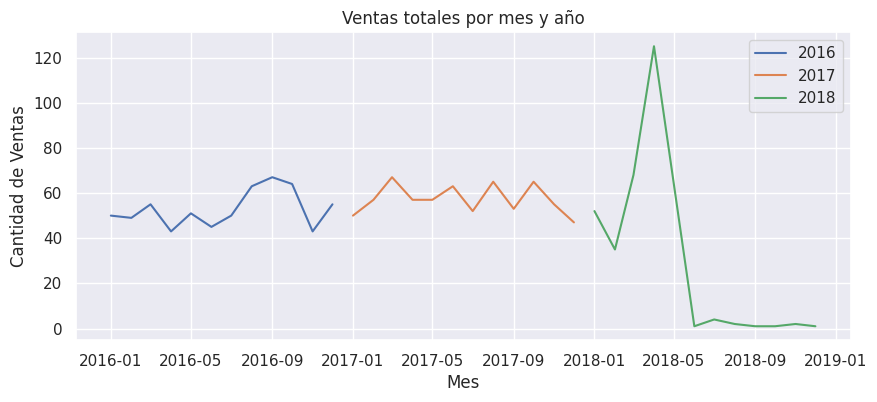

In [90]:
df['Fecha'] = pd.to_datetime(df['Año'] + '-' + df['Mes'])
plt.figure(figsize=(10, 4))
for año in df['Año'].unique():
    plt.plot(df[df['Año'] == año]['Fecha'], df[df['Año'] == año]['TotalVentas'], label=año)
plt.title('Ventas totales por mes y año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.legend()
plt.show()



##Unión de Tablas


La unión de tablas en SQL es una operación que permite combinar los datos de dos o más tablas relacionadas por una o más columnas en común. Existen diferentes tipos de unión de tablas, según el criterio que se use para seleccionar las filas que se van a incluir en el resultado.

###JOIN

La cláusula JOIN se utiliza para combinar filas de dos o más tablas, en función de una columna relacionada entre ellas.

In [96]:
query = """
SELECT * FROM  orders
JOIN customers
ON orders.customer_id = customers.customer_id
LIMIT 3 OFFSET 10;
"""
df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,11,1326,4,2016-01-05,2016-01-08,2016-01-07,2,7,1326,Tarra,Guerrero,None,tarra.guerrero@aol.com,10 Baker St.,Auburn,NY,13021
1,12,91,4,2016-01-06,2016-01-08,2016-01-09,1,2,91,Marvin,Mullins,(619) 635-2027,marvin.mullins@aol.com,7489 Redwood Drive,San Diego,CA,92111
2,13,873,4,2016-01-08,2016-01-11,2016-01-11,2,6,873,Patience,Clayton,None,patience.clayton@hotmail.com,68 Chestnut Dr.,Niagara Falls,NY,14304


In [104]:
query = """
SELECT p.product_id, p.product_name, c.category_name FROM categories c
JOIN products p
ON p.category_id = c.category_id
LIMIT 10;
"""
df = pd.read_sql_query(query, connection)
df

,product_id,product_name,category_name
0,21,Electra Cruiser 1 (24-Inch) - 2016,Children Bicycles
1,22,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,Children Bicycles
2,23,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,Children Bicycles
3,83,Trek Boy's Kickster - 2015/2017,Children Bicycles
4,84,Sun Bicycles Lil Kitt'n - 2017,Children Bicycles
5,85,Haro Downtown 16 - 2017,Children Bicycles
6,86,Trek Girl's Kickster - 2017,Children Bicycles
7,87,Trek Precaliber 12 Boys - 2017,Children Bicycles
8,88,Trek Precaliber 12 Girls - 2017,Children Bicycles
9,89,Trek Precaliber 16 Boys - 2017,Children Bicycles


###LEFT JOIN
Devuelve todas las filas de la tabla de la izquierda, y las filas de la tabla de la derecha que coinciden con la condición de unión. Si no hay coincidencia, se rellena con valores nulos.

Para la siguiente consulta, se hará del uso de un doble LEFT JOIN ya que queremos unir 3 tablas, pero donde solo nos importará los datos de 2 de ellas. Se buscará el la cantidad de ventas que tuvo cada miembro del Staff durante el año 2018, para esto agrupamos por el Nombre mediante GROUP BY y finalmente lo ordenamos de manera descendente segun la cantidad de ventas.

In [147]:
query = """
SELECT st.first_name as Nombre,
      st.last_name as Apellido,
      SUM(oi.quantity) as "Total Ventas 2018"
FROM orders as od
LEFT JOIN staffs st ON st.staff_id = od.staff_id
LEFT JOIN order_items oi ON oi.order_id = od.order_id
WHERE od.order_date > "2017-12-31"
GROUP BY 	st.first_name
ORDER BY "Total Ventas 2018" DESC;
"""
df = pd.read_sql_query(query, connection)
df

,Nombre,Apellido,Total Ventas 2018
0,Marcelene,Boyer,408
1,Venita,Daniel,401
2,Genna,Serrano,203
3,Mireya,Copeland,155
4,Kali,Vargas,109
5,Layla,Terrell,40


Grafico simple para mostrar el resultado anterior de forma mas visible.

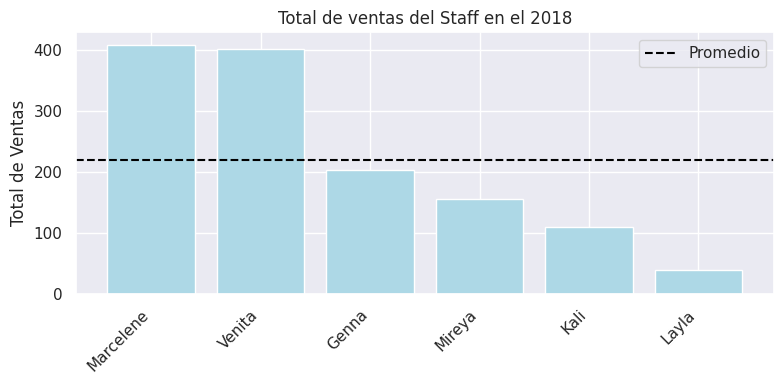

In [149]:
media=df['Total Ventas 2018'].mean()
#df_sorted = df.sort_values(by='Total Ventas 2018', ascending=False)
plt.figure(figsize=(8, 4))
plt.bar(df['Nombre'], df['Total Ventas 2018'], color='lightblue')
plt.xlabel('')
plt.axhline(y=media, color='black', linestyle='--', label='Promedio')
plt.ylabel('Total de Ventas')
plt.title('Total de ventas del Staff en el 2018')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
# Muestra el gráfico
plt.show()

Tambien existen otros tipos de uniones además de los que hemos vistos, por ejemplo:
- RIGHT JOIN: devuelve todas las filas de la tabla de la derecha, y las filas de la tabla de la izquierda que coinciden con la condición de unión. Si no hay coincidencia, se rellena con valores nulos.
- FULL JOIN: devuelve todas las filas de ambas tablas, rellenando con valores nulos cuando no hay coincidencia.

No vamos a mostrar ejemplos de estos tipos de uniones, porque se basan en el mismo principio que los anteriores, y además se usan menos frecuentemente.

##Window Function

Una window function o función de ventana en SQL es una función especial que usa los valores de una o varias filas para devolver un valor para cada fila. A diferencia de una función de agregación, que devuelve un solo valor para varias filas, una función de ventana conserva las filas individuales en la salida, agregando valores adicionales calculados.

La sintaxis de la función ventana esta compuesta de la siguiente manera:

```
SELECT column_1, column_2,
	<window_function> OVER( PARTITION BY .... ORDER BY .... <window_frame>)AS
column_alias
FROM table;
```



Donde:
- `window_function`: es el nombre de la función de ventana que se quiere usar, como SUM(), AVG(), RANK(), ROW_NUMBER(), etc.
- `OVER`: es la cláusula que define la ventana, es decir, el conjunto de filas sobre el que se aplica la función de ventana.
- `PARTITION BY` - divide la ventana en grupos mas pequeños. Es como group by.
- `ORDER BY` - Ordena las filas dentro del marco de la ventana.


In [158]:
query = """
SELECT
  strftime('%m', order_date) AS Mes,
  strftime('%Y', order_date) AS Año,
  COUNT(*) AS TotalVentas,
  SUM(COUNT(*)) OVER (
    PARTITION BY strftime('%Y', order_date)
    ORDER BY strftime('%m', order_date) ASC
  ) AS AcumuladoMes
FROM orders
GROUP BY strftime('%m', order_date), strftime('%Y', order_date)
ORDER BY Año ASC, Mes ASC
LIMIT 7
OFFSET 9;
"""
df=pd.read_sql_query(query, connection)
df

,Mes,Año,TotalVentas,AcumuladoMes
0,10,2016,64,537
1,11,2016,43,580
2,12,2016,55,635
3,01,2017,50,50
4,02,2017,57,107
5,03,2017,67,174
6,04,2017,57,231
